# **Loan Prediction**

The aim of this project is to predict real-estate prices using the machine learning algorithms: Logistic Regression, Decision tree, Random Forest. The three of them will show different results for the accuracy. 

# **Imports**

In [29]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from datetime import datetime
import io
import mpl_toolkits
import numpy as np
%matplotlib inline


In [30]:
# Load the data
local_file = files.upload()
train_data = io.BytesIO(local_file['results.csv'])
df = pd.read_csv(train_data)


Saving results.csv to results (1).csv


# **Preparing the data for training the models**

Encoding to numeric data in order to start the training of the models.

In [31]:
#drop the uniques loan id
df.drop('Loan_ID', axis = 1, inplace = True)

df.drop('Unnamed: 0', axis = 1, inplace = True)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             981 non-null    float64
 1   Married            981 non-null    float64
 2   Dependents         981 non-null    float64
 3   Education          981 non-null    int64  
 4   Self_Employed      981 non-null    float64
 5   ApplicantIncome    981 non-null    int64  
 6   CoapplicantIncome  981 non-null    float64
 7   LoanAmount         981 non-null    float64
 8   Loan_Amount_Term   981 non-null    float64
 9   Credit_History     981 non-null    float64
 10  Property_Area      981 non-null    int64  
 11  Loan_Status        981 non-null    float64
 12  LoanAmount_log     981 non-null    float64
 13  TotalIncome        981 non-null    float64
 14  TotalIncome_log    981 non-null    float64
dtypes: float64(12), int64(3)
memory usage: 115.1 KB


**Train-Test Split dataset**

Heatmaps are very useful to find relations between two variables in a dataset and this way the user gets a visualisation of the numeric data. No correlations are extremely high. Each square shows the correlation between the variables on each axis. 

*   The correlations between the feautures can be explained:


> The close to 1 the correlation is the more positively correlated they are; that is as one increases so does the other and the closer to 1 the stronger this relationship is. It is noticable that the correlation between the `ApplicantIncome` and `LoanAmount` is 0.57, which mean that they have a positive correlation, but not strong.



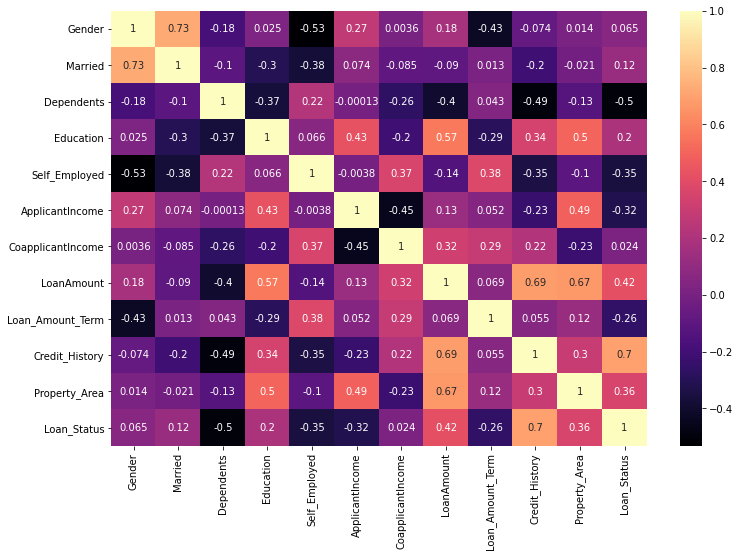

In [33]:
from pandas import DataFrame
%matplotlib inline
plt.figure(figsize=(12, 8))
df_temp = df.copy()
Index= ['Gender',	'Married',	'Dependents',	'Education',	'Self_Employed',	'ApplicantIncome',	'CoapplicantIncome',	'LoanAmount',	'Loan_Amount_Term',	'Credit_History',	'Property_Area',	'Loan_Status']
Cols = ['Gender',	'Married',	'Dependents',	'Education',	'Self_Employed',	'ApplicantIncome',	'CoapplicantIncome',	'LoanAmount',	'Loan_Amount_Term',	'Credit_History',	'Property_Area',	'Loan_Status']
df_temp = DataFrame(abs(np.random.randn(12, 12)), index=Index, columns=Cols)

sns.heatmap(df_temp.corr(), annot=True, cmap = 'magma')
plt.show()

Importing sklearn libraries

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

Splitting into train and test set after choosing the right features X and labels y

In [35]:
y = df['Loan_Status']
X = df.drop('Loan_Status', axis = 1)

To split the dataset, I will use random sampling with 80/20 train-test split; that is, 80% of the dataset will be used for training and set aside 20% for testing:

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

Analyzing the numeric features.


In [37]:
numeric_features = df.select_dtypes(include=[np.number])

In [38]:
numeric_features.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'LoanAmount_log', 'TotalIncome', 'TotalIncome_log'],
      dtype='object')

In [39]:
# use only those input features with numeric data type 
df = df.select_dtypes(include=["int64","float64"]) 

In [40]:
# set the target and predictors
y = df.Loan_Status  # target

# use only those input features with numeric data type 
df_temp = df.select_dtypes(include=["int64","float64"]) 

X = df_temp.drop(["Loan_Status"],axis=1)  # predictors

# **Modeling**:

Three models will be built and evaluated by their performances with R-squared metric. Additionally, insights on the features that are strong predictors of house prices, will be analised .

**Logistic Regression**





In [41]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_reg=model.predict(X_test)
evaluation = f1_score(y_test, y_reg)
evaluation

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8869565217391304

Reporting the coefficient value for each feature. Notice that the coefficients are both positive and negative. The positive scores indicate a feature that predicts class 1, whereas the negative scores indicate a feature that predicts class 0.

>The importance of a feature is measured by calculating the increase in the model's prediction error after permuting the feature. A feature is "important" if shuffling its values increases the model error, because in this case the model relied on the feature for the prediction.

Feature: 0, Score: -0.03256
Feature: 1, Score: 0.51781
Feature: 2, Score: 0.00937
Feature: 3, Score: 0.34609
Feature: 4, Score: -0.06700
Feature: 5, Score: -0.00001
Feature: 6, Score: 0.00002
Feature: 7, Score: 0.00291
Feature: 8, Score: -0.00062
Feature: 9, Score: -1.56869
Feature: 10, Score: -0.47370
Feature: 11, Score: 0.01679
Feature: 12, Score: 0.00001
Feature: 13, Score: -0.06696


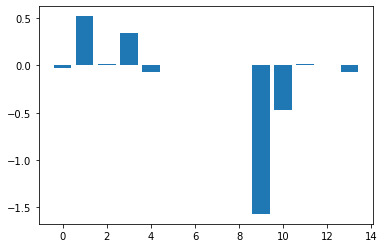

In [42]:
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

>This might mean that your model is underfit (not enough iteration and it has not used the feature enough) or that the feature is not good and you can try removing it to improve final quality.

**Decision tree:**


1.  Creating classifier
2.  Fitting classifier with train data




In [43]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Do predictions on a test set. **Testing** the model by testing the test data.

In [44]:
y_tree=dtree.predict(X_test)
print(y_tree)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 2. 1. 2. 1. 1. 2. 1. 1. 1. 2. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1.
 2. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 2. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 2. 1. 2. 1. 1. 1. 2. 1. 2. 2. 1. 2. 1. 1.
 2. 1. 1. 1. 2. 2. 1. 1. 1. 1. 2. 1. 1. 1. 1. 2. 1. 1. 1. 1. 2. 2. 1. 1.
 1. 1. 2. 1. 1. 1. 1. 1. 2. 1. 2. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 1. 1.
 1. 1. 2. 2. 1.]


In [45]:
evaluation = f1_score(y_test, y_tree)
evaluation

0.8825396825396825

> Evaluate classsifier measures accuracy.

 **Random forests**

In [46]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [47]:
regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [48]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.2370558375634518
Mean Squared Error: 0.12299492385786802
Root Mean Squared Error: 0.35070632138281743


In [49]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [50]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.24 degrees.


In [51]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors /y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 81.88 %.


In [52]:
#Random forest determined feature importances
rf.feature_importances_

array([0.01833149, 0.02464218, 0.        , 0.02197566, 0.01984483,
       0.17034899, 0.10092351, 0.11204092, 0.04050256, 0.12931742,
       0.03928051, 0.11182718, 0.10588618, 0.10507855])

In [53]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

**Testing** the model by testing the test data.




In [54]:
y_forest=forest.predict(X_test)
print(y_forest)

[1. 1. 1. 2. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 2. 1. 1. 2. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 2. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 2. 1. 2. 1. 1.
 2. 1. 2. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1.
 1. 1. 1. 1. 1.]


Result of the **accuracy**.

In [55]:
evaluation_f= f1_score(y_test, y_forest)
evaluation_f

0.8955223880597015

In [56]:
importance = rf.feature_importances_

# map feature importance values to the features
feature_importances = zip(importance, X.columns)

#list(feature_importances)
sorted_feature_importances = sorted(feature_importances, reverse = True)

#print(sorted_feature_importances)
top_15_predictors = sorted_feature_importances[0:15]
values = [value for value, predictors in top_15_predictors]
predictors = [predictors for value, predictors in top_15_predictors]
print(predictors)

['ApplicantIncome', 'Credit_History', 'LoanAmount', 'LoanAmount_log', 'TotalIncome', 'TotalIncome_log', 'CoapplicantIncome', 'Loan_Amount_Term', 'Property_Area', 'Married', 'Education', 'Self_Employed', 'Gender', 'Dependents']


ValueError: ignored

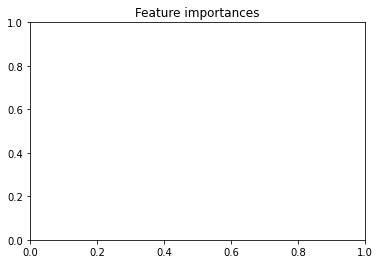

In [57]:
plt.figure()
plt.title( "Feature importances")
plt.bar(range(len(y_forest)), values,color="r", align="center");
plt.xticks(range(len(y_forest)), predictors, rotation=90);

# Conclusion
From the Modelling, it can be concluded:

1. After the exploring of different types of modelling, that the more accurate model is Logistic Regression than Decision tree.
2. From the evaluation of the three models, it can be noticed that the Random forest performed better than others


